<a href="https://colab.research.google.com/github/EstebanS3/Laboratorios_Python/blob/Laboratorios/laboratorio_4_Clusters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Integrantes:
Esteban E Sanchez Sanchez,Gabriel Varela Chacon,Dixon Bustos Medina,Jefferson Padilla Gonzalez

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
n_samples = 300
n_features = 2
n_clusters = 3

X, y = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_clusters, random_state=42)

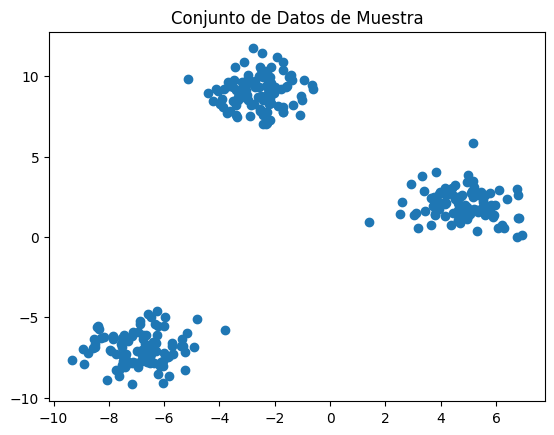

In [ ]:
plt.scatter(X[:, 0], X[:, 1])
plt.title("Conjunto de Datos de Muestra")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

# Obtener las etiquetas de clúster para cada punto de datos
labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


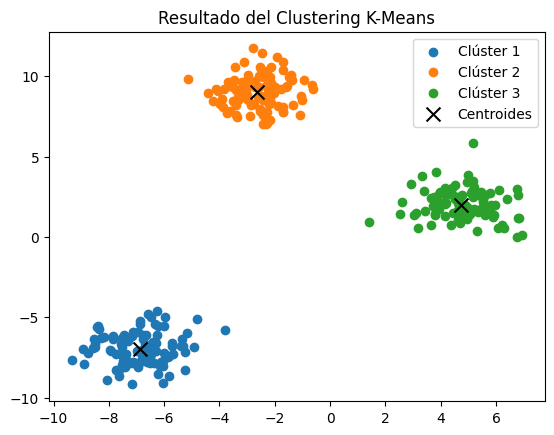

In [ ]:
# Dividir los datos en función de las etiquetas de clúster
for i in range(n_clusters):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], label=f'Clúster {i+1}')

# Mostrar los centroides de los clústeres
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', marker='x', s=100, label='Centroides')
plt.title("Resultado del Clustering K-Means")
plt.legend()
plt.show()

Uso con los datos de proyecto

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving drug_deaths.csv to drug_deaths.csv


Cargar datos

In [ ]:
df=pd.read_csv('/content/drug_deaths.csv')
data=pd.DataFrame(df)
print(data)
print(data.head())

      Unnamed: 0       ID                    Date  DateType   Age     Sex  \
0              0  14-0273  06/28/2014 12:00:00 AM       1.0   NaN     NaN   
1              1  13-0102  03/21/2013 12:00:00 AM       0.0  48.0    Male   
2              2  16-0165  03/13/2016 12:00:00 AM       0.0  30.0  Female   
3              3  16-0208  03/31/2016 12:00:00 AM       0.0  23.0    Male   
4              4  13-0052  02/13/2013 12:00:00 AM       0.0  22.0    Male   
...          ...      ...                     ...       ...   ...     ...   
5100        5100  15-0466  09/08/2015 12:00:00 AM       1.0  43.0    Male   
5101        5101  17-0618  07/22/2017 12:00:00 AM       1.0  21.0    Male   
5102        5102  18-0646  08/14/2018 12:00:00 AM       0.0  30.0    Male   
5103        5103  14-0124  03/16/2014 12:00:00 AM       0.0  33.0    Male   
5104        5104  16-0637  09/15/2016 12:00:00 AM       0.0  33.0    Male   

              Race  ResidenceCity ResidenceCounty ResidenceState  ... Trama

Overdose desglose

In [ ]:
#df.replace(to_replace=r'^\s*$', value=np.nan, regex=True)
df = df[['MannerofDeath', 'Race','ID','Sex','ResidenceCity','Age']]
df = pd.get_dummies(df, columns=['MannerofDeath','Race','Sex','ResidenceCity'])
df = df.dropna(axis=1)
overdose_variables=df.drop(["ID","MannerofDeath_ACCIDENT"],axis=1)
overdose_variables.describe()

,MannerofDeath_Accident,MannerofDeath_Natural,MannerofDeath_Pending,MannerofDeath_accident,Race_Asian Indian,"Race_Asian, Other",Race_Black,Race_Chinese,Race_Hawaiian,"Race_Hispanic, Black",...,ResidenceCity_WINDSOR LOCKS,ResidenceCity_WINGDALE,ResidenceCity_WINSTED,ResidenceCity_WOLCOTT,ResidenceCity_WOODBRIDGE,ResidenceCity_WOODBURY,ResidenceCity_WOODSTOCK,ResidenceCity_YANKTON,ResidenceCity_YORKTOWN HEIGHTS,ResidenceCity_ZIONSVILLE
count,5105.000000,5105.000000,5105.000000,5105.000000,5105.000000,5105.000000,5105.000000,5105.000000,5105.000000,5105.000000,...,5105.000000,5105.000000,5105.000000,5105.000000,5105.000000,5105.000000,5105.000000,5105.000000,5105.000000,5105.000000
mean,0.992360,0.000196,0.002742,0.002547,0.002742,0.003526,0.084819,0.000392,0.000196,0.004701,...,0.004505,0.000392,0.003330,0.001763,0.000979,0.001175,0.000784,0.000196,0.000196,0.000196
std,0.087079,0.013996,0.052301,0.050404,0.052301,0.059281,0.278639,0.019791,0.013996,0.068411,...,0.066977,0.019791,0.057616,0.041955,0.031284,0.034266,0.027984,0.013996,0.013996,0.013996
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Valores en normalizados

In [ ]:
overdose_norm=(overdose_variables-overdose_variables.min())/(overdose_variables.max()-overdose_variables.min())
overdose_norm

,MannerofDeath_Accident,MannerofDeath_Natural,MannerofDeath_Pending,MannerofDeath_accident,Race_Asian Indian,"Race_Asian, Other",Race_Black,Race_Chinese,Race_Hawaiian,"Race_Hispanic, Black",...,ResidenceCity_WINDSOR LOCKS,ResidenceCity_WINGDALE,ResidenceCity_WINSTED,ResidenceCity_WOLCOTT,ResidenceCity_WOODBRIDGE,ResidenceCity_WOODBURY,ResidenceCity_WOODSTOCK,ResidenceCity_YANKTON,ResidenceCity_YORKTOWN HEIGHTS,ResidenceCity_ZIONSVILLE
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5100,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5101,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5102,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5103,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Codo de Jambu/Para selccionar la cantidad adecuada

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

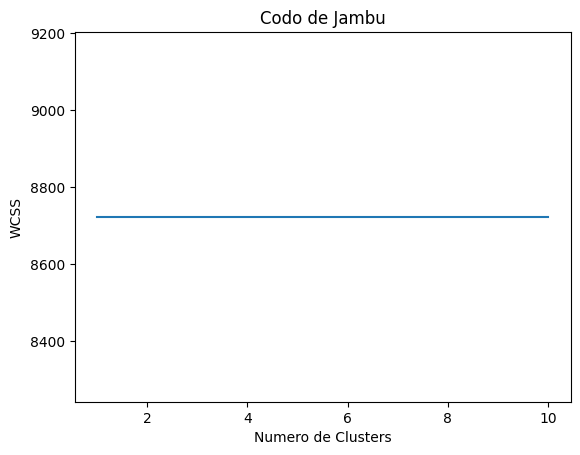

In [ ]:
#Suma de cuadraros
wcss = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=1,max_iter=1500)
  kmeans.fit(overdose_norm)  #uso kmeans en overdose normalizado
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title("Codo de Jambu")
plt.xlabel('Numero de Clusters')
plt.ylabel('WCSS')
plt.show()

Clustering

In [ ]:
clustering=KMeans(n_clusters=3,max_iter=1500)#generacion de modelo
clustering.fit(overdose_norm)#Consume el modelo

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=1500, n_clusters=3)

Cargo en el DF

In [ ]:
df['KMeans_Clusters']=clustering.labels_
pca = PCA(n_components=2)
pca_overdose = pca.fit_transform(overdose_norm)
pca_overdose_df = pd.DataFrame(data = pca_overdose,columns=['Componente_1','Componente_2'])
pca_N_overdose = pd.concat([pca_overdose_df,df[['KMeans_Clusters']]],axis=1)

pca_N_overdose

,Componente_1,Componente_2,KMeans_Clusters
0,0.268596,0.583352,2
1,-0.453042,0.798394,2
2,1.070583,-0.130951,0
3,-0.331549,-0.312493,1
4,-0.432024,0.500273,2
...,...,...,...
5100,-0.331291,-0.315208,1
5101,-0.331056,-0.315391,1
5102,-0.331213,-0.312003,1
5103,-0.353580,-0.148672,1


Grafico

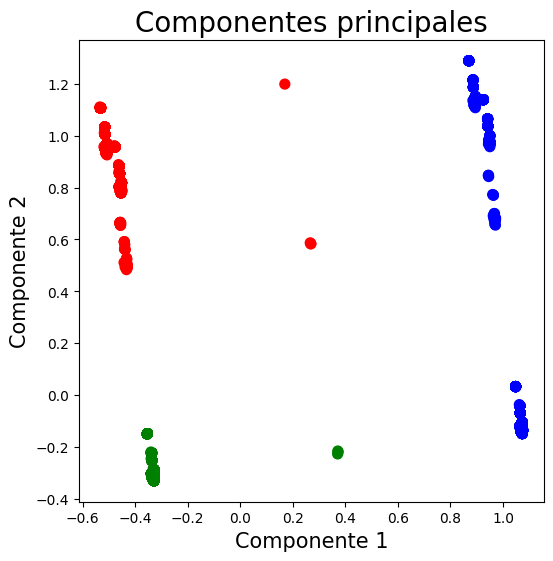

In [ ]:
fig=plt.figure(figsize=(6,6))

ax=fig.add_subplot(1,1,1)
ax.set_xlabel('Componente 1',fontsize=15)
ax.set_ylabel('Componente 2',fontsize=15)
ax.set_title('Componentes principales',fontsize=20)

color_theme = np.array(["blue","green","red"])
ax.scatter(x = pca_N_overdose.Componente_1,y=pca_N_overdose.Componente_2,c=color_theme[pca_N_overdose.KMeans_Clusters],s=50)

plt.show()